Miniprojekt 1: Daten untersuchen
=

---

Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

In diesem Miniprojekt bearbeiten wir den MNIST-Datensatz mit Bildern von handgeschriebenen Ziffern. Der Datensatz ist so berühmt und fundamental für Machine Learning und Bildverarbeitung, dass er als "Hello World des Deep Learning" bezeichnet wird. Wir trainieren den Umgang mit Python, Numpy und Matplotlib durch Analyse, Vorverarbeitung und grafische Darstellung der Daten - das sind sehr wichtige Basics des Machine Learning!

Benötigtes Grundlagenwissen über digitale Bilder
=

Digitale Bilder bestehen aus diskreten Datenpunkten (Pixel) mit unterschiedlicher Intensität. Bei Schwarz-Weiß-Bildern liegt die Intensität zwischen 0 (schwarz) und 255 (weiß) bei 8-Bit-Codierung (2^8=256). Bei RGB-Farbbildern benutzt man drei Kanäle für rot, grün und blau, die jeweils Intensitäten zwischen 0 und 255 haben. Schwarz-Weiß-Bilder können daher gut als zweidimensionale Arrays gespeichert werden, ähnlich einer Matrix, die so viele Zeilen und Spalten hat wie das Bild hoch und breit ist. Weitere Informationen z.B. hier: https://en.wikipedia.org/wiki/Pixel

Setup und Daten 
=

In [ ]:
# install required packages specified in pipfile
!pipenv install

In [26]:
import numpy as np

Einstellungen für hübsche Bilder:

In [27]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [28]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [29]:
# print info about MNIST data
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [30]:
mnist.keys()  # we only use 'data' and 'target'

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Wir speichern die Bilder in X und die zugehörigen Klassennamen (also welche Ziffer auf den Bildern zu sehen ist) in y:

In [31]:
X, y = mnist.data, mnist.target

Aufgabe 1: Untersuchen Sie das Datenformat
=

**TODO**: 1a) Welches Datenformat hat X? Welcher Datentyp liegt zu Grunde und welche Dimension hat X? **(3 Punkte)**

In [32]:
###### TODO: HIER BITTE CODE EINGEBEN #####
print(f"type of X: {type(X)}")
print(f"data type: {X.dtype}")
print(f"dimension: {X.shape}")



type of X: <class 'numpy.ndarray'>
data type: int64
dimension: (70000, 784)


**IHRE ANTWORT:** 

**TODO**: 1b) Erklären Sie die Dimension von X - woher kommt die ermittelte Anzahl Zeilen und Anzahl Spalten?  **(2 Punkte)**

In [33]:
###### TODO: HIER BITTE CODE EINGEBEN (OPTIONAL) #####
print(f"image amount: {X.shape[0]}")
print(f"pixel amount per image: {X.shape[1]}")

image amount: 70000
pixel amount per image: 784


**Antwort**: 

Wir plotten ein Beispielbild mit der Bibliothek Matplotlib:

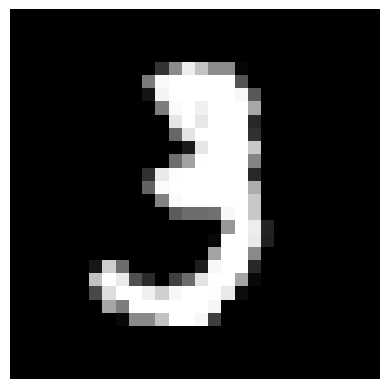

In [34]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="Greys_r") # Greys colormap goes from white to black, but images go from black (0) to white (255) -> "_r" reverts the colormap
    plt.axis("off")

image = X[10]
plot_digit(image)
plt.show()

**TODO**: 1c) Das könnte eine 3 sein. Wie können Sie diese Vermutung überprüfen, also aus dem Datensatz die korrekte Ziffer des gezeigten Beispielbildes X[10] herausfinden? Implementieren Sie entweder den korrekten Code oder antworten Sie im Textfeld darunter.  **(1 Punkt)**

In [35]:
###### TODO: HIER BITTE CODE EINGEBEN (OPTIONAL) #####
print(f"Real value of the image: {y[10]}")

Real value of the image: 3


**Antwort**: 

Wir plotten weitere Beispielbilder für einen Überblick über die Daten:

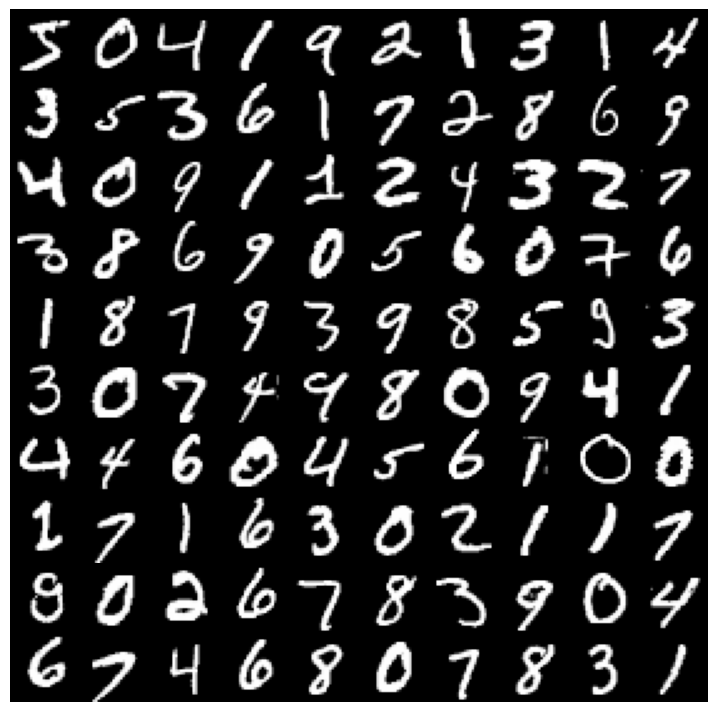

In [36]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Aufgabe 2: Finden Sie typische und atypische Ziffern
=

**TODO**: 2a) Um die Daten zu verstehen, kann es hilfreich sein, den Mittelwert zu berechen, in diesem Fall das durchschnittliche Aussehen jeder Ziffer. Berechnen Sie für jede Ziffer den Mittelwert pro Pixel aus allen Einzelbildern dieser Ziffer, indem Sie die `numpy`-Funktion `mean()` auf das Array `class_arrayX` anwenden. Achten Sie darauf, den richtigen Wert für `axis` in der `mean()`-Funktion zu setzen. Begründen Sie im Textfeld unten kurz Ihre Wahl für `axis`! **(3 Punkte)**

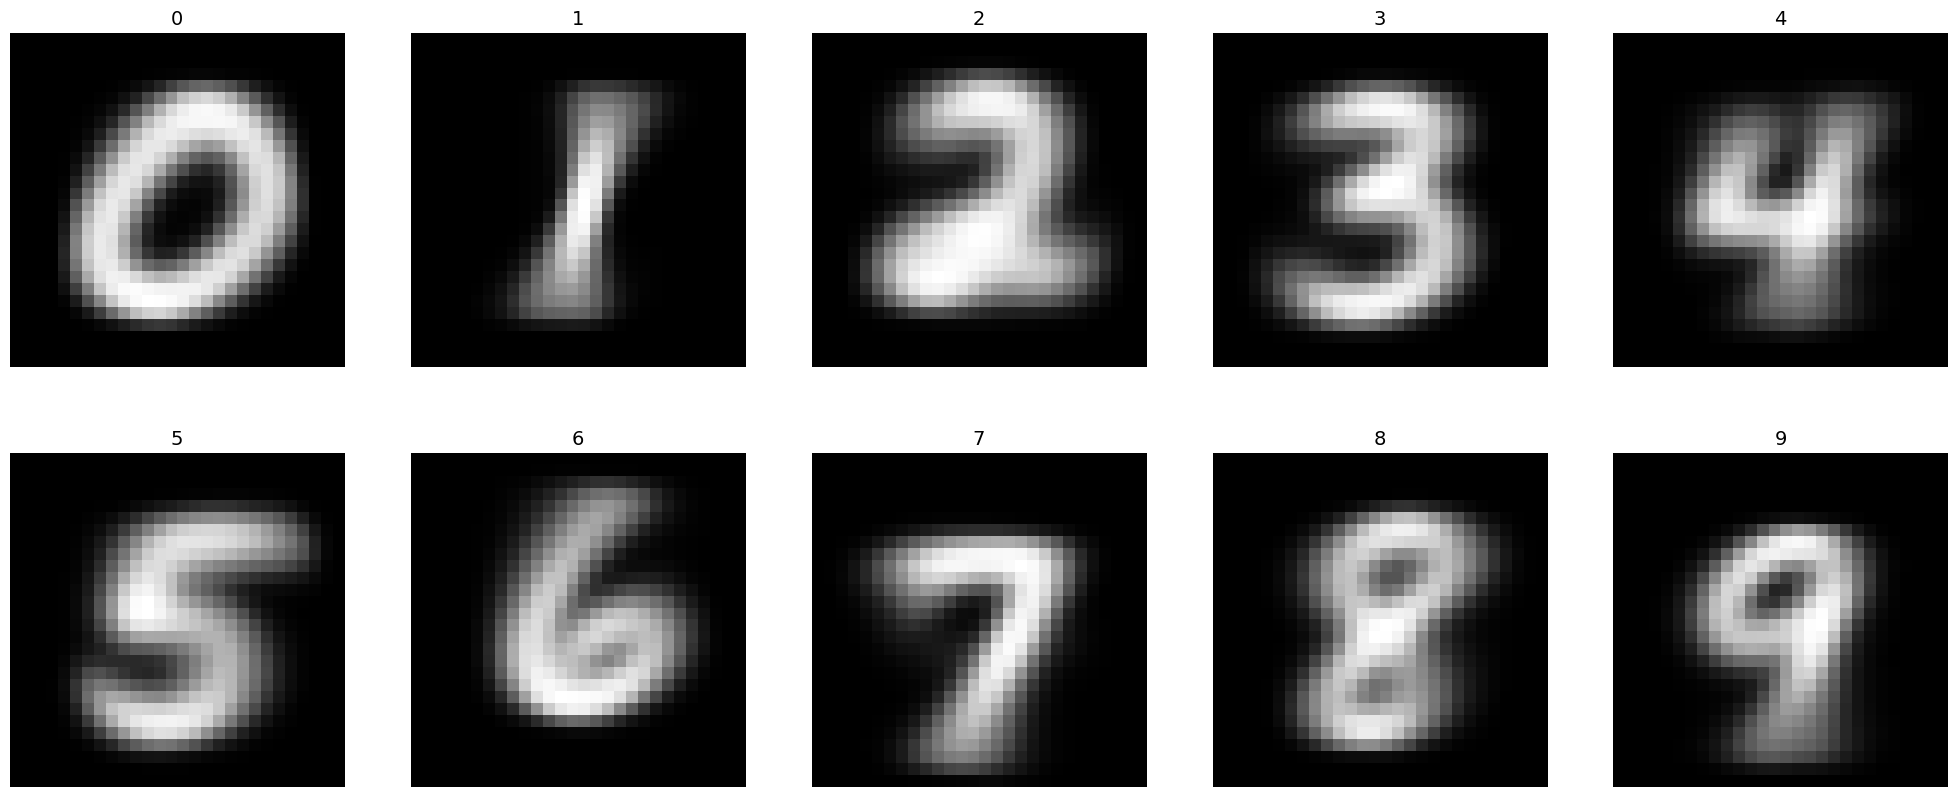

In [37]:
# Reshape X to format (70000, 28, 28)
X_reshaped = X.reshape([70000, 28, 28])

def get_class_arrays(class_index, X_input, y_input):
    """
    Returns the Data X and labels y of a single digit given by class_index.
    """
    return X_input[y_input==str(class_index)], y_input[y_input==str(class_index)]

def get_mean_images(X, y):
    """
    Returns an array mean_images containing 10 mean images for 10 digits.
    """
    mean_images = np.zeros((10, 28, 28))
    
    for i in range(10):
        # For each digit, get the class arrays by calling the function get_class_arrays
        class_arrayX, class_arrayY = get_class_arrays(i, X, y)
        
        ##### TODO: HIER BITTE CODE EINGEBEN #####
        
        mean_image = class_arrayX.mean(axis=0)
        
        ##### END STUDENT CODE
        
        mean_images[i][:][:] = mean_image

    return mean_images

def plot_mean_images(images):
    """
    Plots 10 mean images for 10 digits.
    """
    figure = plt.figure(figsize=(25,10))
    for i in range(10):
        mean_image = images[i][:][:]
        plt.subplot(2,5,i+1)
        plt.axis("off")
        plt.title(i)
        plt.imshow(mean_image, cmap="Greys_r")
    

mean_images = get_mean_images(X_reshaped, y)
plot_mean_images(mean_images)


**Antwort:** 

Die durchschnittlichen Bilder sehen schön gleichmäßig aus, aber ist der Datensatz wirklich so gleichmäßig? Zu den Schwierigkeiten von Machine Learning gehört es, dass einzelne Samples oft völlig aus dem Rahmen fallen. Solche atypischen Beispiele können uns helfen zu verstehen, warum ein Algorithmus versagt, und bessere Methoden zu wählen. 

Wir wollen daher für jede Ziffer die Abweichung eines beliebigen Bildes vom Durchschnittsbild mit der Frobenius-Norm berechnen. Wir plotten dann jeweils das typischste Bild (mit dem kleinsten Fehler / der kleinsten Abweichung) und das atypischste Bild (mit dem größten Fehler / der größten Abweichung) sowie das zugehörige Differenzbild.

**TODO**: 2b) Berechnen Sie jeweils den Index des Bildes mit der größten und der kleinsten Abweichung vom Durchschnittsbild. Sie können dafür z.B. die `numpy`-Funktion `argmax()` verwenden. **(1 Punkt)**

distance_images.shape= (6903, 28, 28)
distance_images.shape= (7877, 28, 28)
distance_images.shape= (6990, 28, 28)
distance_images.shape= (7141, 28, 28)
distance_images.shape= (6824, 28, 28)
distance_images.shape= (6313, 28, 28)
distance_images.shape= (6876, 28, 28)
distance_images.shape= (7293, 28, 28)
distance_images.shape= (6825, 28, 28)
distance_images.shape= (6958, 28, 28)


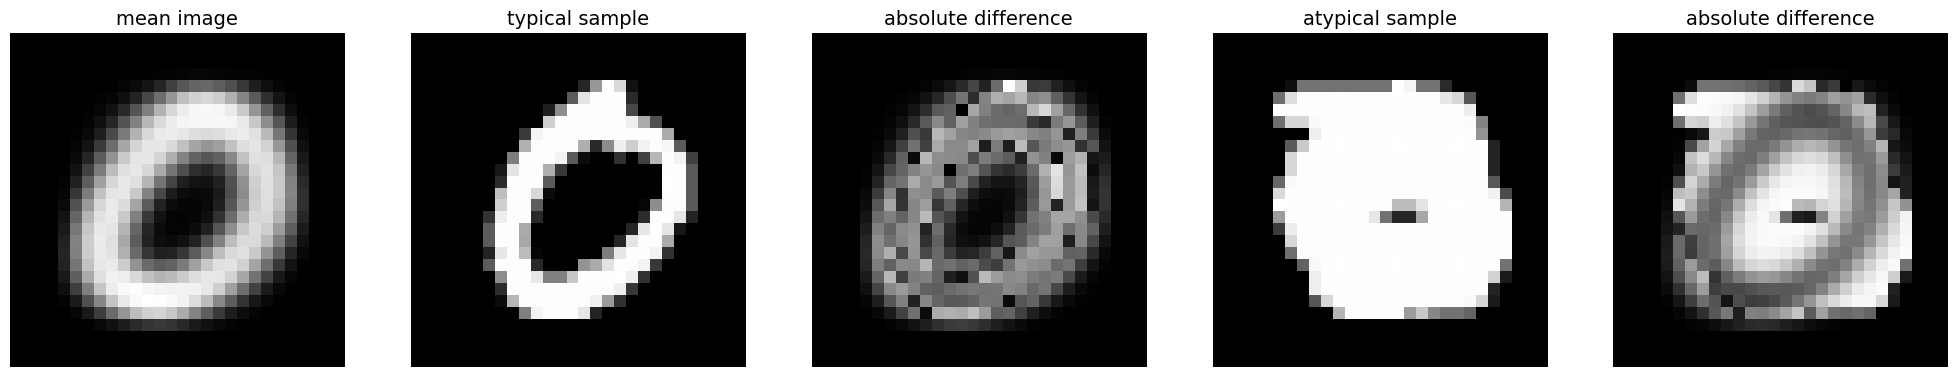

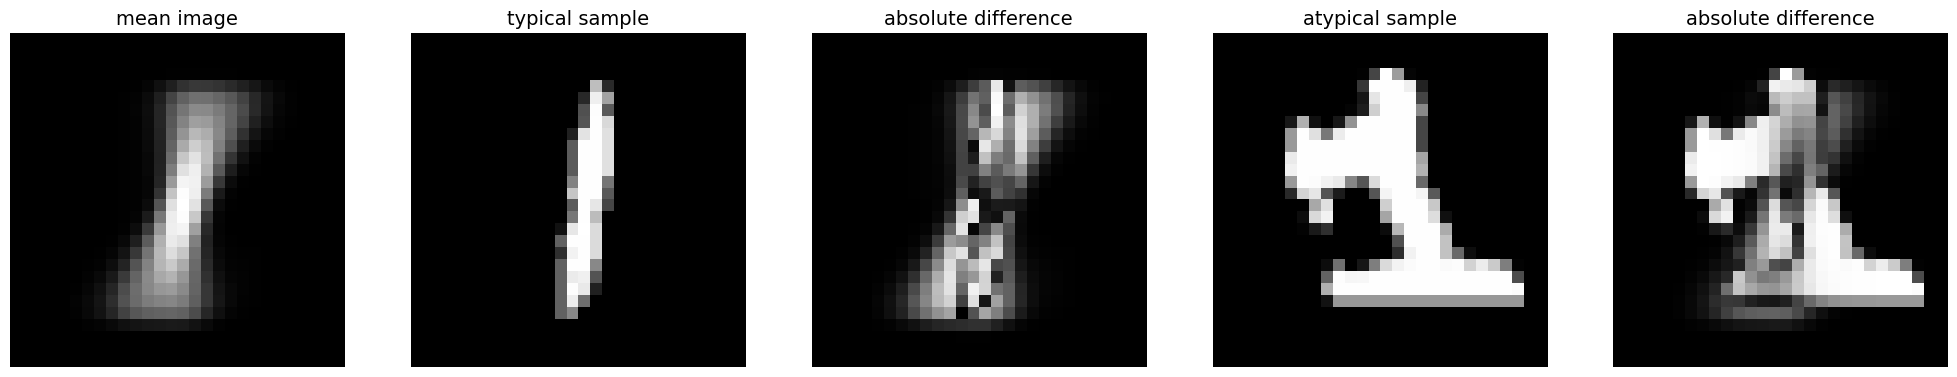

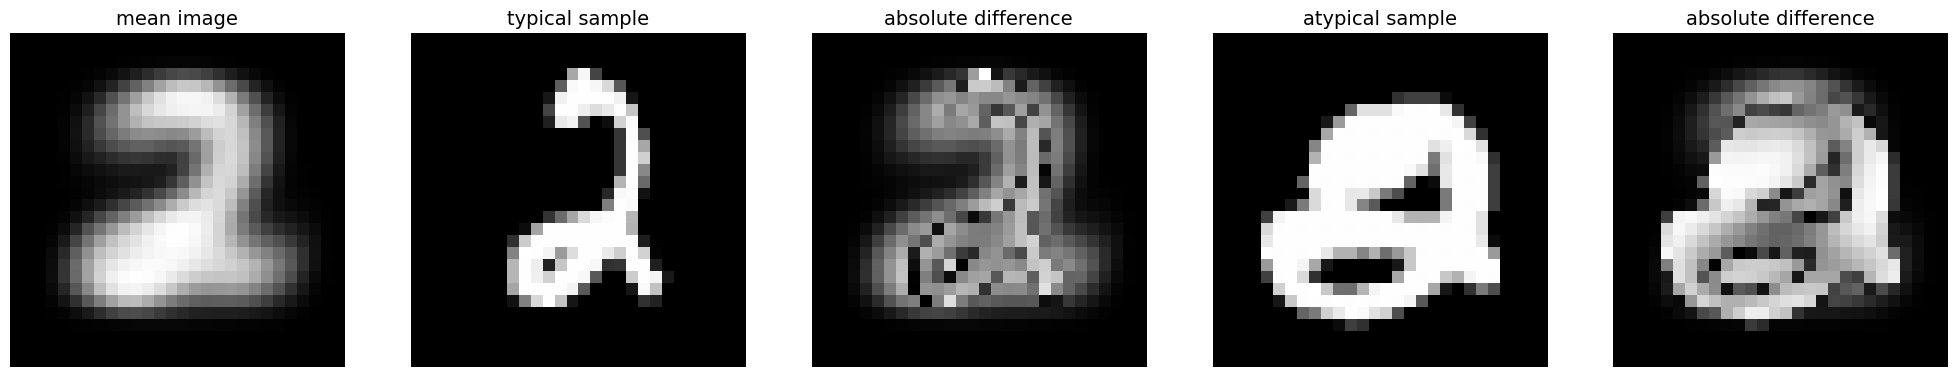

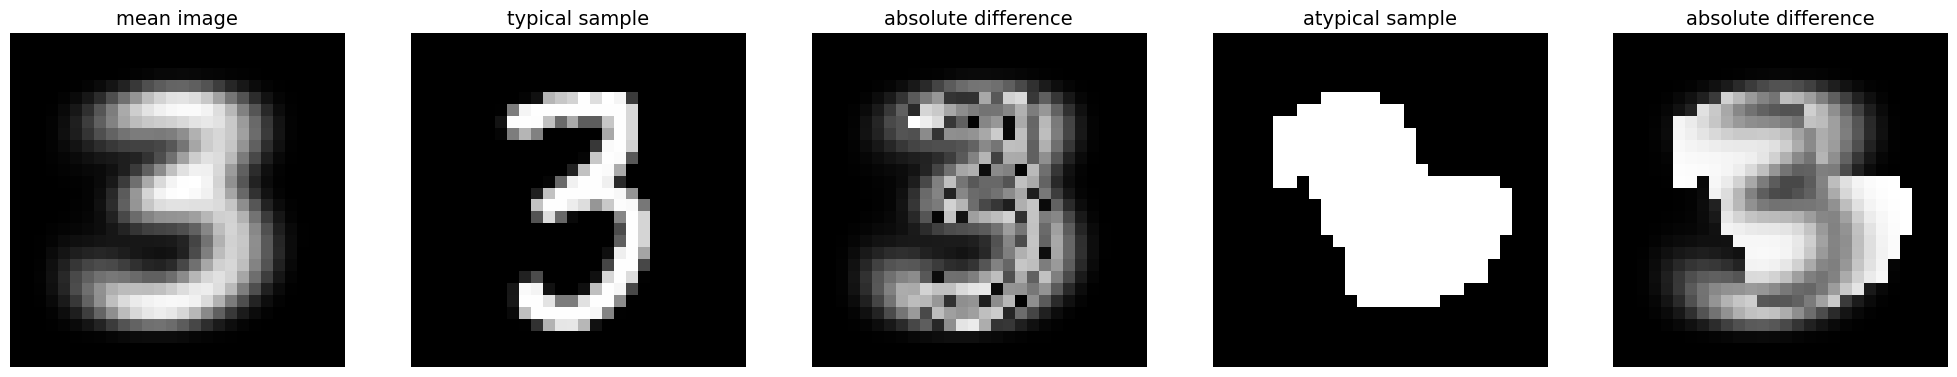

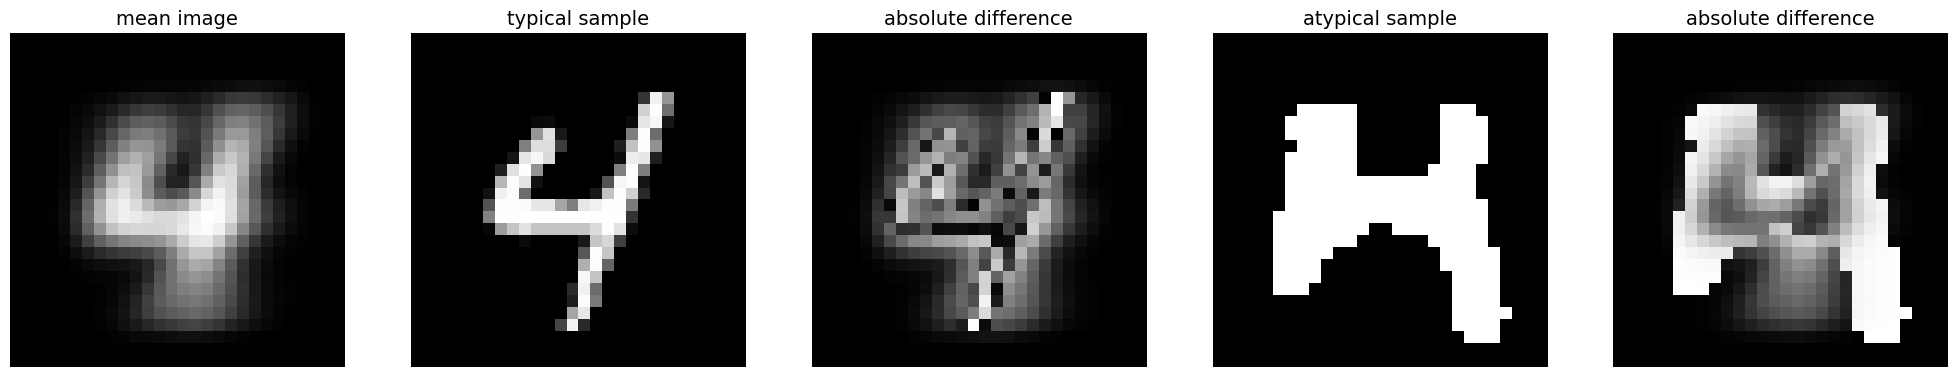

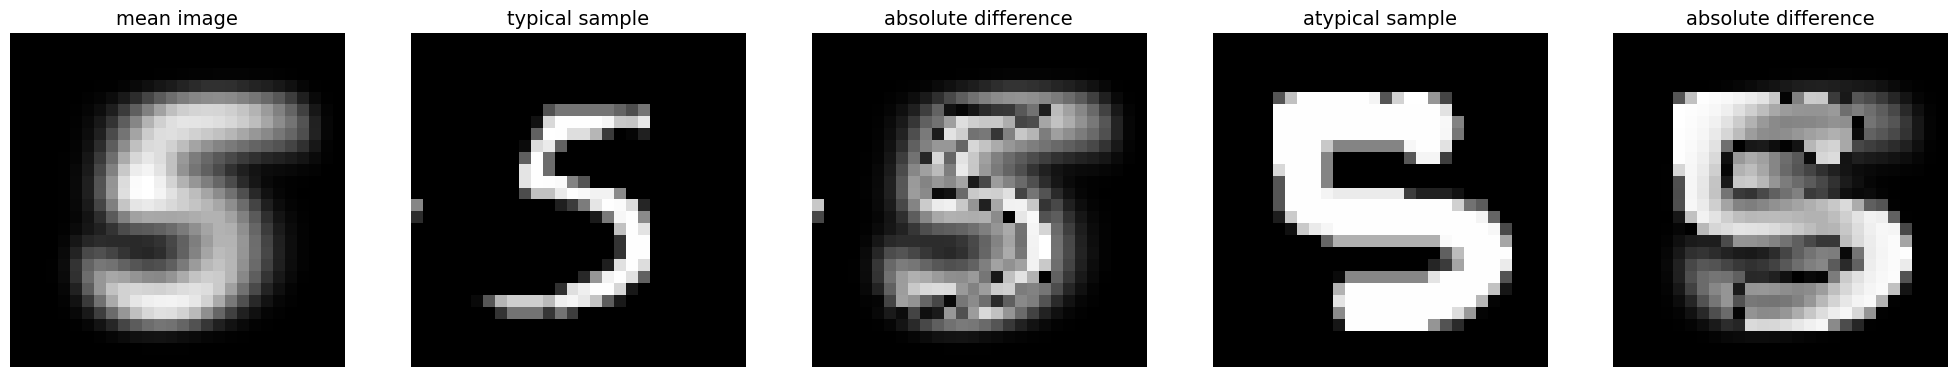

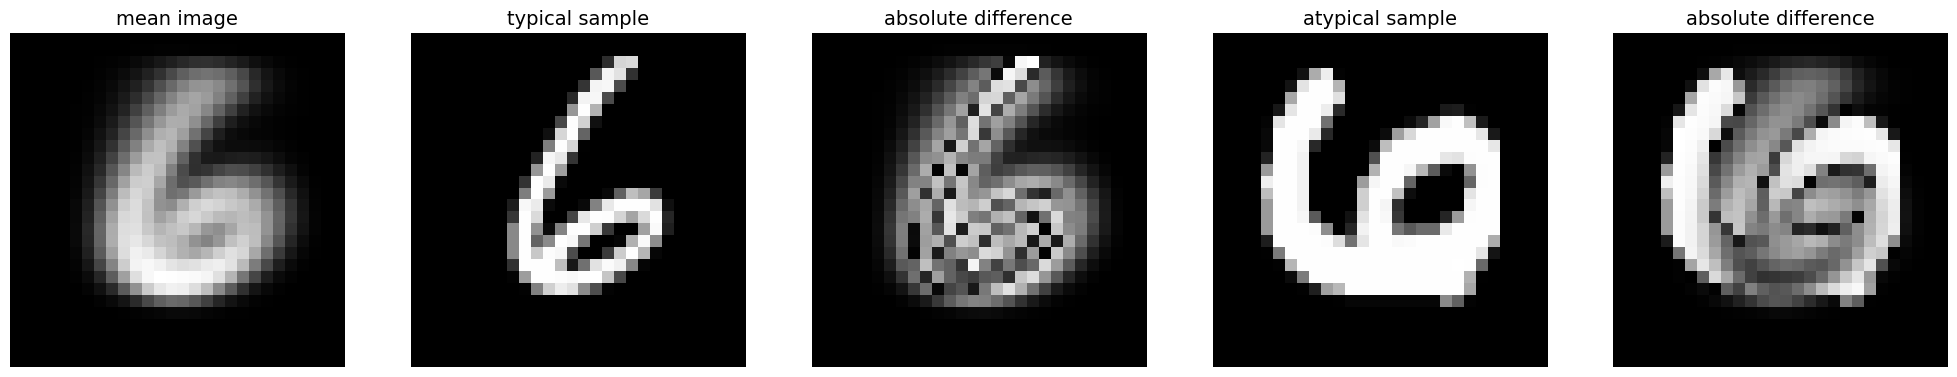

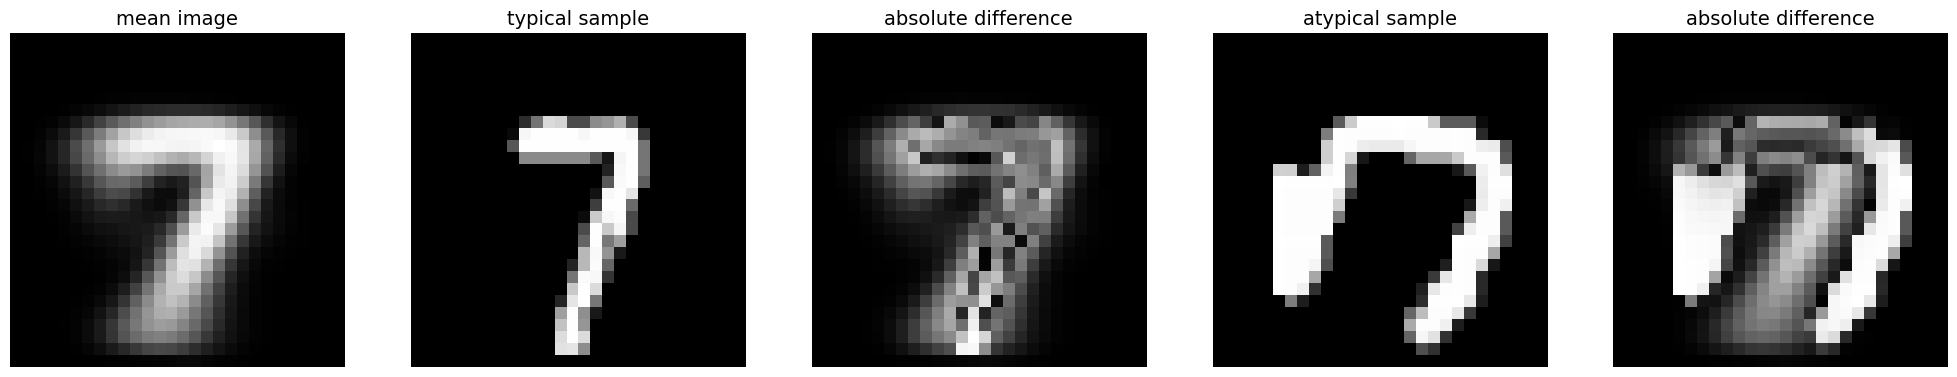

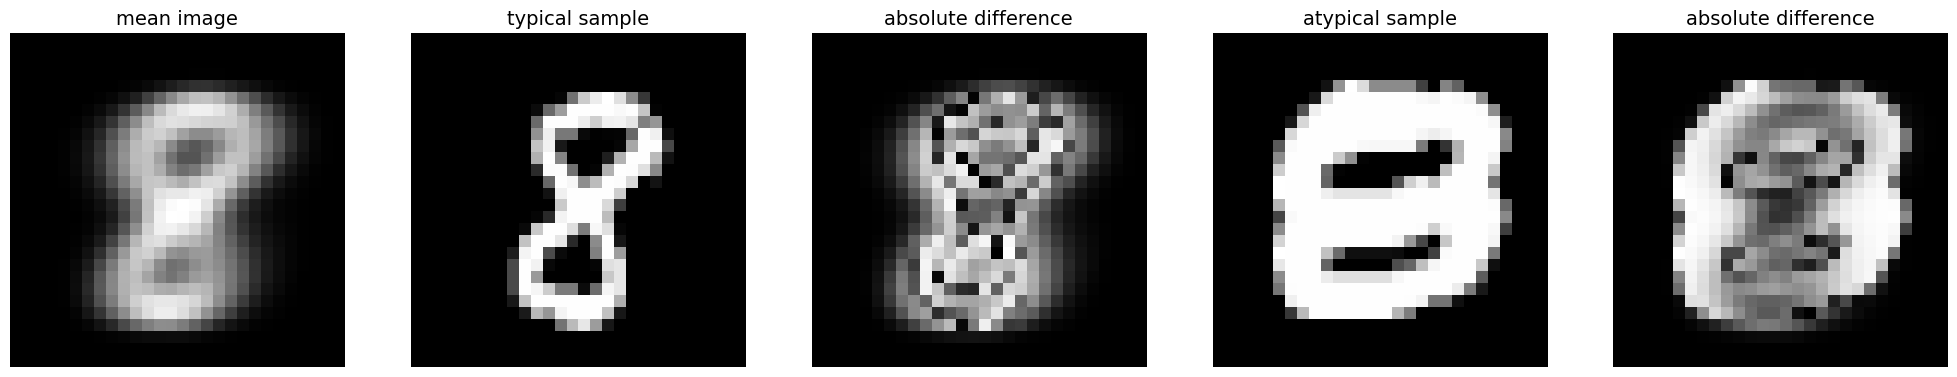

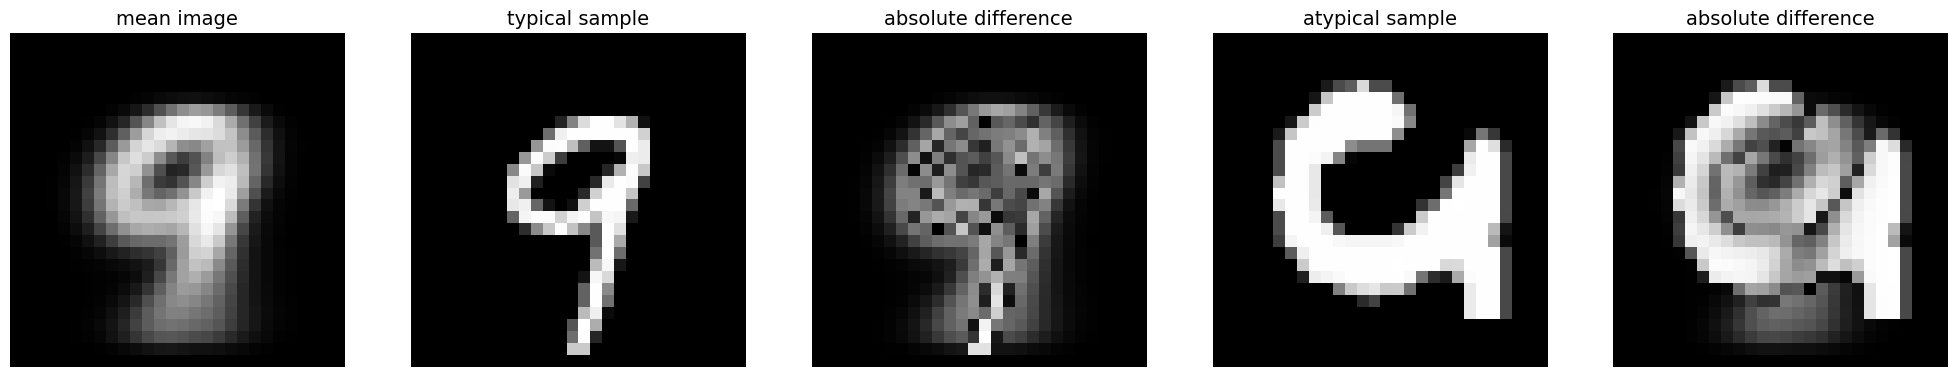

In [38]:
def calc_distances(number, class_array, mean_images):
    """
    Returns array of distance images and distances = error averaged over each digit
    """
    distance_images = np.zeros((len(class_array), 28, 28))
    print("distance_images.shape=", distance_images.shape)
    # distance images, i.e. absolute pixel difference between average image and actual image
    distance_images = np.abs(class_array - mean_images[number])

    distances = np.linalg.norm(distance_images, ord='fro', axis=(1,2))/(28*28) # Frobenius norm over all pixels, divided by number of pixels 
                                                                               # -> average error in this image
    return distance_images, distances

def plot_distance_image(i_max, i_min, number, mean_images, class_array, distance_images):
    """
    Plots typical and atypical sample with difference images
    """
    figure = plt.figure(figsize=(25,50))
    plt.subplot(1,5,1)
    plot_digit(mean_images[number])
    plt.title("mean image")
    plt.subplot(1,5,2)
    plot_digit(class_array[i_min])
    plt.title("typical sample")
    plt.subplot(1,5,3)
    plot_digit(distance_images[i_min])
    plt.title("absolute difference")
    plt.subplot(1,5,4)
    plot_digit(class_array[i_max])
    plt.title("atypical sample")
    plt.subplot(1,5,5)
    plot_digit(distance_images[i_max])
    plt.title("absolute difference")


for number in range(10):
    class_arrayX, _ = get_class_arrays(number, X_reshaped, y)
    distance_images, distances = calc_distances(number, class_arrayX, mean_images)

    ##### TODO: Berechnen Sie den Index der größten bzw. kleinsten Abweichung in distances
    
    i_max = np.argmax(distances)
    i_min = np.argmin(distances)
    
    ##### END STUDENT CODE

    # plots of results
    plot_distance_image(i_max, i_min, number, mean_images, class_arrayX, distance_images)



Aufgabe 3: Histogramme und Balkendiagramme
=

Um die Datenverteilung zu verstehen, sind Histogramme nützlich. Wir plotten für jede Ziffer ein Histogramm über die Pixel-Werte. Wir benutzen dazu die ```hist()```-Funktion von Matplotlib.

**TODO** 3a) Finden Sie das Interface der ```hist()```-Funktion in der Online-Dokumentation heraus: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html). Beachten Sie, dass das Input-Array die Dimension (n,) haben muss, also ein mehrdimensionales Array zuerst mit ```reshape``` umgewandelt werden muss. Experimentieren Sie mit der Anzahl Klassen (bins) und wählen Sie eine sinnvolle Anzahl. Begründen Sie Ihre Wahl! Was passiert bei einer zu geringen Anzahl an bins? **(4 Punkte)**



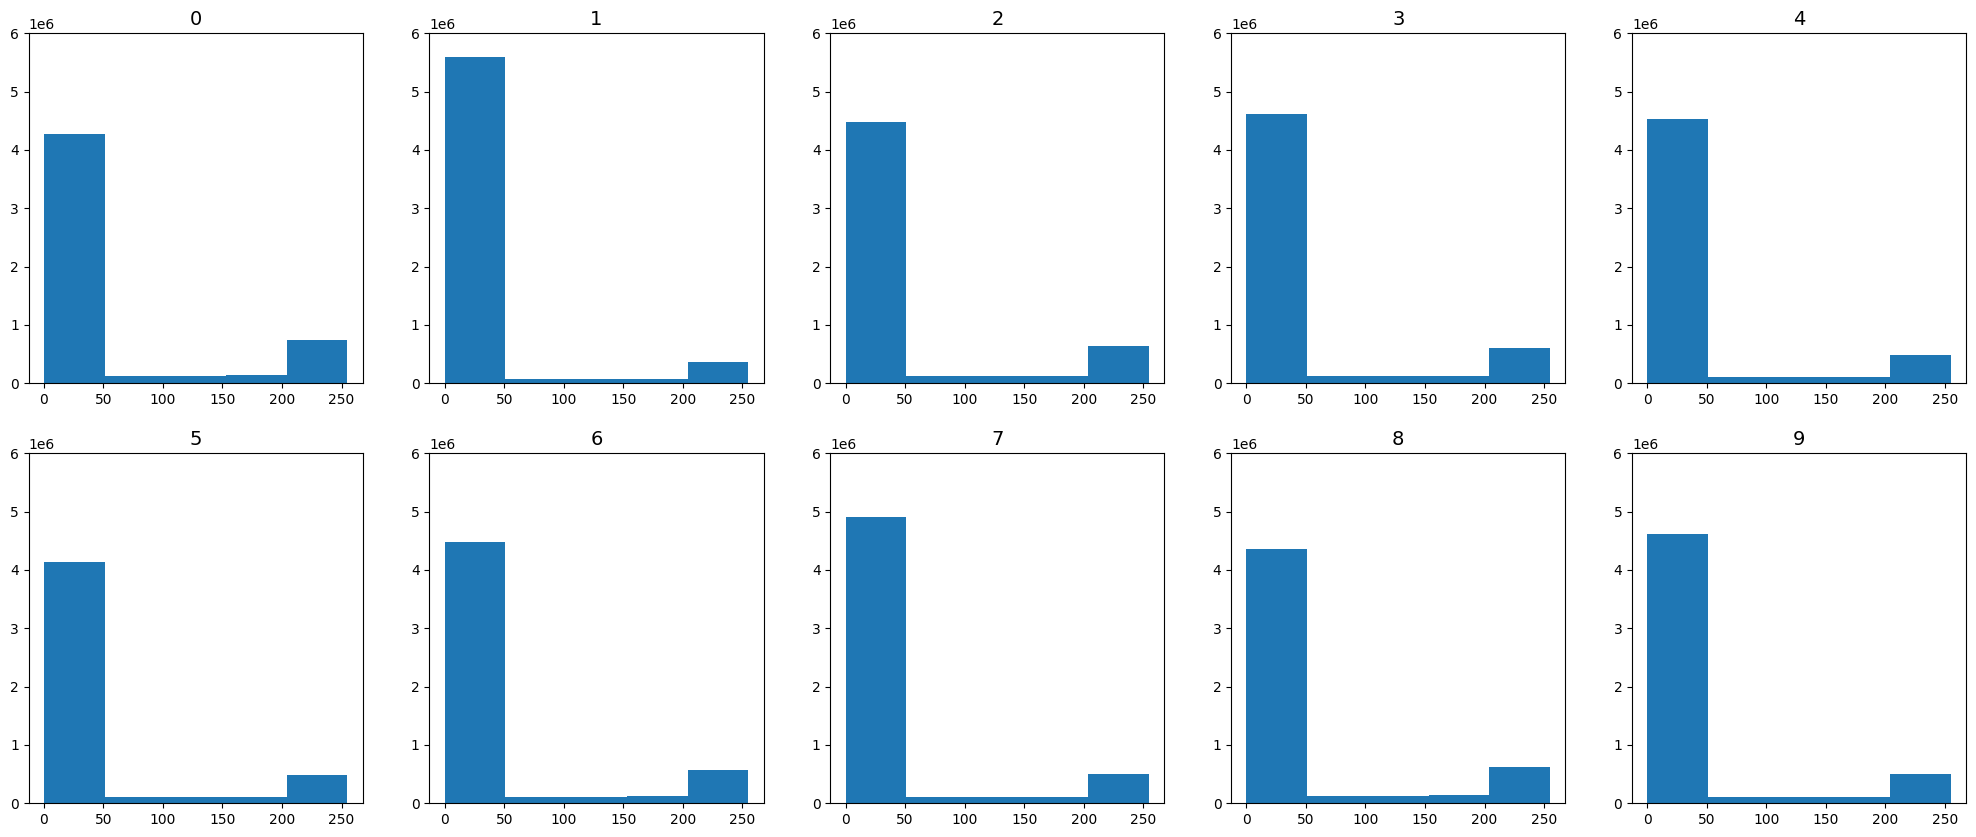

In [39]:

figure = plt.figure(figsize=(25,10))
def plot_histogram(X_reshaped, y):
    for i in range(10):
        x, _ = get_class_arrays(i, X_reshaped, y)
        plt.subplot(2,5,i+1)
        
        ##### TODO: HIER BITTE CODE EINGEBEN #####
        x = x.reshape(-1)
        plt.hist(x, bins=5)
        
        ##### END STUDENT CODE
        
        plt.title(i)
        ax = plt.gca() # get current axis
        ax.set_ylim([0, 6e6])

plot_histogram(X_reshaped, y)


**Antwort**: I choose 5 because our dataset's images usually have nearly 0 and nearly 255 pixel values. That means there are mostly black and white pixels. There are little amount of gray pixels. So I want to show the distribution with 5 intervals. 0-50 black, 50-100 dark gray, 100-150 gray, 150-200 light gray, 200-250 white.


**TODO**: 3b) Was können Sie aus den Histogrammen über die MNIST-Daten ablesen? **(1 Punkt)**

**Antwort:** I think this distribution shows each number's pixel values, such as digit 1 images' have less white pixels than digit 0 images' 

**TODO**: 3c) Berechnen Sie die gemittelte Pixel-Intensität pro Ziffer, also den durchschnittlichen Grauwert gemittelt über alle Bilder und alle Pixel der Ziffer 0, dann der Ziffer 1 etc. Wir stellen das Ergebnis dann in einem Balkendiagramm mit der ```bar()```-Funktion von Matplotlib dar.  **(1 Punkt)**

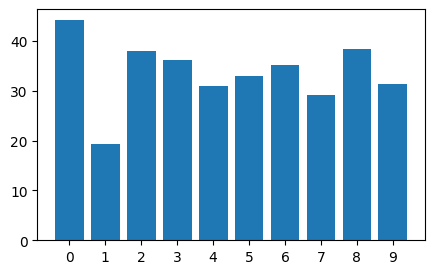

In [40]:
figure = plt.figure(figsize=(5,3))
def get_mean_barchart(X_reshaped, y):
    mean_values = []
    for i in range(10):
        class_arrayX, _ = get_class_arrays(i, X_reshaped, y)
        ##### TODO: HIER BITTE CODE EINGEBEN #####

        mean_value = np.mean(class_arrayX.reshape(-1))

        
        ##### END STUDENT CODE
        mean_values.append(mean_value)

    plt.bar(np.arange(10), mean_values, align='center')
    plt.xticks(np.arange(10))

get_mean_barchart(X_reshaped, y)

**TODO**: 3d) Was können Sie aus dem Balkendiagramm über die MNIST-Daten ablesen?

**Antwort:** For example 0 images are brightest, their pixel intensity is most

Aufgabe 4: Data Augmentation
=

Als nächstes schreiben wir eine Funktion, die ein MNIST Bild um eine beliebige Anzahl Pixel in eine beliebige Richtung verschiebt (links, rechts, oben oder unten). Dazu benutzen wir die `shift()`-Funktion aus dem `scipy.ndimage`-Modul. Zum Beispiel verschiebt `shift(image, [2, 1], cval=0)` das Bild zwei Pixel nach unten und ein Pixel nach rechts. 

In [41]:
from scipy.ndimage import shift

In [42]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")

    return shifted_image

Probieren wir es aus:

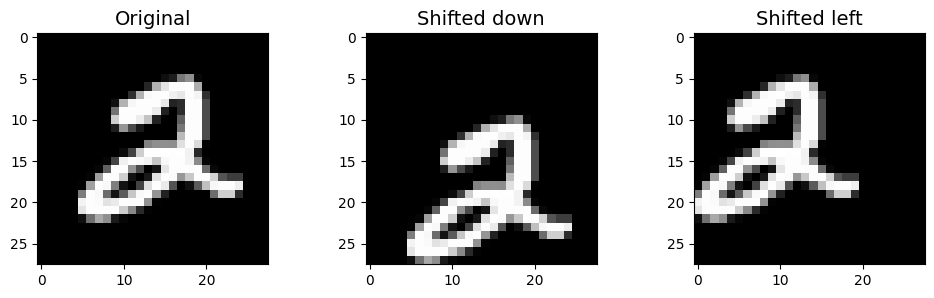

In [43]:
image = X[5]  # random number
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys_r")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys_r")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys_r")
plt.show()

**TODO**: 4) Wozu kann Data Augmentation im Machine Learning verwendet werden? Welche Methoden der Datenaugmentierung gibt es zum Beispiel in der Bildklassifikation? Beschreiben Sie eigene Ideen oder recherchieren Sie. **(2 Punkte)**

**Antwort**: We can take a picture of something from different angles, rotations or shifting. If our data have just same angle, no rotation then the model wont learn these type of changes and cannot read the image. We can do shifting, making blur or other type of filtering, rotating, maybe adding some noise. To have more general learning model.

Aufgabe 5: Verständnisfragen
=

Sie haben inzwischen einen guten Überblick über den MNIST Datensatz erhalten. Wir wollen später ein Machine Learning Programm schreiben, das die Ziffer des Bildes ermittelt. Testen Sie Ihr Verständnis mit den folgenden Fragen!

**TODO** 5a) Um welches der 5 Machine Learning Probleme handelt es sich bei einem solchen Programm, das die Ziffer des Bildes vorhersagt? Begründen Sie Ihre Antwort. **(1 Punkt)**

**Antwort**: Classification. Because we have images and these images have labels, exaclty 10 different classes and every image can have just one class.

**TODO** 5b) Würden Sie dieses ML-Programm als Batch Learning oder Online Learning realisieren? **(1 Punkt)**

**Antwort**: Batch learning. Online learning needs always new data and adapt that but in digit recognition I dont think we need this. We can use lots of data once and create the model.

**TODO** 5c) Handelt es sich um ein überwachtes oder unüberwachtes Lernen? **(1 Punkt)**

**Antwort**: Supervised because we are doing classification and data have labels.

**TODO** 5d) Wäre es sinnvoll, dieses ML-Problem mit Reinforcement Learning umzusetzen? Begründen Sie Ihre Antwort. **(1 Punkt)**

**Antwort**: We dont want to solve a problem or play something by model. There is no reward or punishment, so we dont need to use reinforcement learning.

In [45]:
!jupyter nbconvert --to webpdf --allow-chromium-download Miniprojekt1_Datenanalyse_student.ipynb

[NbConvertApp] Converting notebook Miniprojekt1_Datenanalyse_student.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 889549 bytes to Miniprojekt1_Datenanalyse_student.pdf
